# 使用Scikit_learn包进行逻辑回归

In [160]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss


# 生成数据

In [161]:
def generate_data(n_samples = 1000, n_features = 2, n_classes = 2, random_state = 42):
    
    X, y = make_classification(
        n_samples = n_samples,
        n_features = n_features,
        n_informative = 2,
        n_redundant = 0,
        n_classes = n_classes,
        random_state = random_state
    )

    return X, y


In [162]:
X, y = generate_data()


# 划分数据集

In [163]:
def split_data(X, y, test_size = 0.2, random_state = 42):
    return train_test_split(X, y, test_size = test_size, random_state = random_state)


In [164]:
X_train, X_test, y_train, y_test = split_data(X, y)


# 训练模型

In [165]:
def train_logistic_regression(X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

In [166]:
model = train_logistic_regression(X_train, y_train)


# 评估模型

### 1. 准确率 | Accuracy

- 预测正确的样本数占总样本数的比例

$$\text{Accuracy} = \frac{\text{预测正确的样本数}}{\text{总样本数}}$$


### 2. 混淆矩阵 | Confusion Matrix

- 用一个矩阵来展示预测结果和真实结果的对比。

| | 预测为正 | 预测为负 |
|---|---|---|
| 实际为正 | TP | FN |
| 实际为负 | FP | TN |

TP：真正例，预测为正，实际为正<br>
TN：真反例，预测为负，实际为负<br>
FP：假正例，预测为正，实际为负<br>
FN：假反例，预测为负，实际为正


### 3. 分类报告 | Classification Report

精确率（Precision）- 预测为正的样本中，实际为正的比例。
$$\text{Precision} = \frac{TP}{TP+FP}$$

召回率（Recall）- 实际为正的样本中，被预测为正的比例。
$$\text{Recall} = \frac{TP}{TP+FN}$$

F1分数（F1-score）- 精确率和召回率的调和平均值。
$$\text{F1} = 2\times\frac{\text{Precision}\times\text{Recall}}{\text{Precision} + \text{Recall}}$$

Support - 每个类别的真实样本数。


In [167]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    
    y_train_proba = model.predict_proba(X_train)
    y_test_proba = model.predict_proba(X_test)

    train_loss = log_loss(y_train, y_train_proba)
    test_loss = log_loss(y_test, y_test_proba)

    print(f"\n 训练集 log_loss: {train_loss:.2f}")
    print(f"\n 测试集 log_loss: {test_loss:.2f}")
    print(f"\n 实际迭代次数: {model.n_iter_}")

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"\n 准确率 | Accuracy rate: {acc}")
    print(f"\n 混淆矩阵 | Confusion matrix: \n {confusion_matrix(y_test, y_pred)}")
    print(f"\n 分类报告 | Classification report: {classification_report(y_test, y_pred)}")

    print("-" * 50)

    print(f"\n 最优权重 (w) : {model.coef_}")
    print(f"\n 最优偏置 (b) : {model.intercept_}")

    w = model.coef_[0]
    b = model.intercept_[0]

    print(f"\n 拟合的函数 | Fitted function: y = sigmoid({w[0]:.4f} * x1 + {w[1]:.4f} * x2 + {b:.4f})")


In [168]:
evaluate_model(model, X_train, y_train, X_test, y_test)



 训练集 log_loss: 0.34

 测试集 log_loss: 0.29

 实际迭代次数: [7]

 准确率 | Accuracy rate: 0.88

 混淆矩阵 | Confusion matrix: 
 [[89 12]
 [12 87]]

 分类报告 | Classification report:               precision    recall  f1-score   support

           0       0.88      0.88      0.88       101
           1       0.88      0.88      0.88        99

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.88      0.88      0.88       200

--------------------------------------------------

 最优权重 (w) : [[-0.32604133  2.03996214]]

 最优偏置 (b) : [0.22454194]

 拟合的函数 | Fitted function: y = sigmoid(-0.3260 * x1 + 2.0400 * x2 + 0.2245)


# 可视化

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
# plt.rcParams['font.sans-serif'] = ['Arial']
# plt.rcParams['axes.unicode_minus'] = False


In [231]:
def plot_decision_boundary(model, X, y):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

    plt.figure(figsize = (9, 7))
    plt.contour(xx, yy, probs, levels = [0.5], colors = "red", linewidths = 2, linestyles = "solid")
    
    decision_boundary = mlines.Line2D([], [], color='red', linewidth=2, linestyle='solid', label='Decision Boundary (Sigmoid = 0.5)')
    plt.legend(handles=[decision_boundary])

    plt.contourf(xx, yy, probs, levels = 25, cmap = "viridis", alpha = 0.6)
    plt.colorbar(label = "Probability of being predicted as 1")
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = "viridis", edgecolor = "k")
    
    plt.xlabel("Feature 1 (x1)")
    plt.ylabel("Feature 2 (x2)")
    plt.title("Logistic regression decision boundary")
    plt.show()


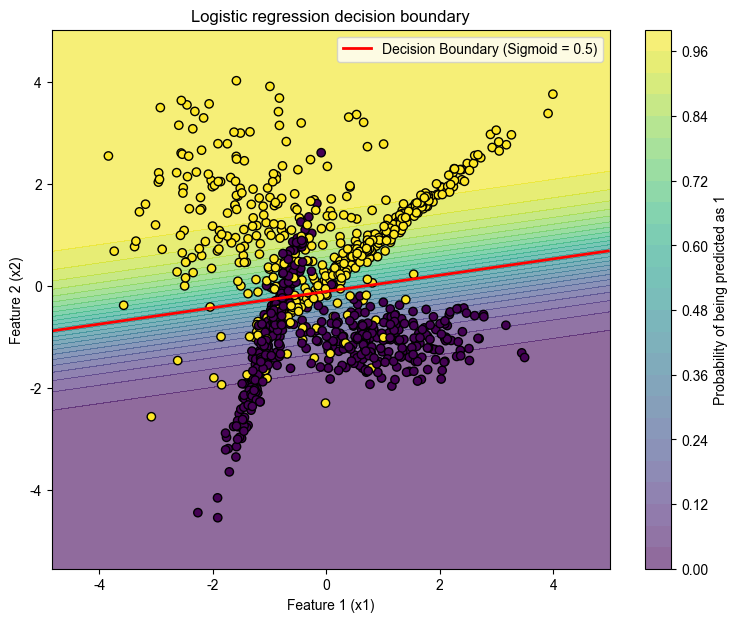

In [232]:
plot_decision_boundary(model, X, y)

In [233]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot = True, fmt = "d", cmap = "Blues")
    plt.xlabel("Predicted value")
    plt.ylabel("True value")
    plt.title("Confusion matrix")
    plt.show()
    

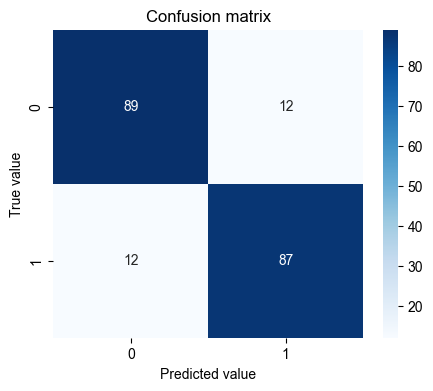

In [234]:
y_pred = model.predict(X_test)
plot_confusion_matrix(y_test, y_pred)